In [1]:
# Load the necessary libraries
import pandas as pd
import numpy as np
import sklearn as sklearn

In [2]:
# Read the CSV data into a Pandas DataFrame
df = pd.read_csv("Social_Network_Ads.csv")

# Display the first few rows of the DataFrame
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Extract feature variables from the DataFrame
X = df.iloc[:, [1, 2, 3]].values
X

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [4]:
# Extract the target variable from the DataFrame
y = df.iloc[:, -1].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [5]:
# Convert categorical data to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [6]:
# Check the shape of the target variable
y.shape

(400,)

In [7]:
# Standardize the feature variables
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [8]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [9]:
# Import and create a K-Nearest Neighbors (KNN) classifier
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5,
                                  metric='manhattan')  #other metric could be 'cosine', 'euclidean', 'haversine', 'l2', 'l1', 
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [10]:
# Make predictions on the test data
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score

ac = accuracy_score(y_test, y_pred)
ac

0.95

In [12]:
# Calculate the accuracy score of the classifier

cm = confusion_matrix(y_test, y_pred)

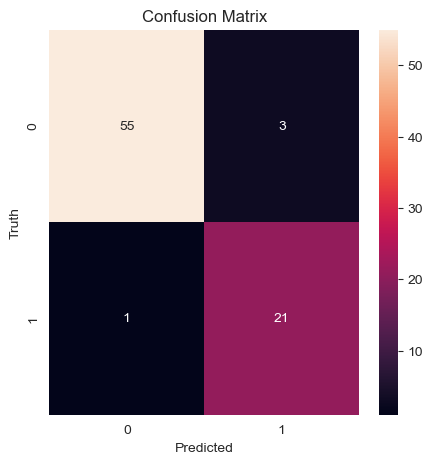

In [13]:
# Display the confusion matrix as a heatmap
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(5, 5))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Explanation of the code above:

This code above performs classification using the k-Nearest Neighbors (KNN) algorithm on a social network advertisement dataset. Follow the explanation of the step by step line of each code done:

1. Import necessary libraries:
   - `import pandas as pd`: Imports the Pandas library, commonly used for data manipulation and analysis.
   - `import numpy as np`: Imports the NumPy library, which is often used for numerical computations.
   - `import sklearn as sklearn`: Imports the scikit-learn library, which is used for machine learning tasks.

3. Read a CSV file into a Pandas DataFrame:
   - `df = pd.read_csv("Social_Network_Ads.csv")`: Loads a CSV file named "Social_Network_Ads.csv" into a Pandas DataFrame called `df`.

5. Display the first few rows of the DataFrame:
   - `df.head()`: Prints the first few rows of the DataFrame to the console.

7. Extract feature variables from the DataFrame:
   - `X = df.iloc[:, [1, 2, 3]].values`: Selects columns 1, 2, and 3 from the DataFrame `df` and converts them into a NumPy array, which represents the feature variables. The `iloc` method is used to select rows and columns from the DataFrame.

9. Extract the target variable from the DataFrame:
   - `y = df.iloc[:, -1].values`: Selects the last column of the DataFrame `df` and converts it into a NumPy array. This represents the target variable.

11. Convert categorical data to numerical data:
    - `from sklearn.preprocessing import LabelEncoder`: Import the `LabelEncoder` class from scikit-learn.
    - `le = LabelEncoder()`: Create a `LabelEncoder` instance called `le`.
    - `X[:, 0] = le.fit_transform(X[:, 0])`: Encode the categorical data in the first column of the feature variables `X` to numerical values using the `fit_transform` method.

13. Check the shape of the target variable `y`:
    - `y.shape`: This line doesn't modify the data but checks and displays the shape (number of elements) of the `y` array.

15. Standardize the feature variables:
    - `from sklearn.preprocessing import StandardScaler`: Import the `StandardScaler` class from scikit-learn.
    - `sc = StandardScaler()`: Create a `StandardScaler` instance called `sc`.
    - `X = sc.fit_transform(X)`: Standardize the feature variables `X` using the `fit_transform` method, making their mean 0 and standard deviation 1.

17. Split the data into training and testing sets:
    - `from sklearn.model_selection import train_test_split`: Import the `train_test_split` function from scikit-learn.
    - `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)`: Split the standardized feature variables (`X`) and target variable (`y`) into training and testing sets. The `test_size` parameter specifies that 20% of the data will be used for testing, and the `random_state` parameter sets a random seed for reproducibility.

19. Display the valid metrics for the KNN algorithm:
    - `sklearn.neighbors.VALID_METRICS['brute']`: This line seems to be an attempt to check the valid metrics for the 'brute' KNN algorithm, but it doesn't actually affect the code's functionality.

21. Import and create a K-Nearest Neighbors (KNN) classifier:
    - `from sklearn.neighbors import KNeighborsClassifier`: Import the `KNeighborsClassifier` class from scikit-learn.
    - `classifier = KNeighborsClassifier(n_neighbors=5, metric='manhattan')`: Create a KNN classifier instance with 5 neighbors and using the 'manhattan' distance metric.
    - `classifier.fit(X_train, y_train)`: Fit the KNN classifier to the training data.

23. Make predictions on the test data:
    - `y_pred = classifier.predict(X_test)`: Use the trained KNN classifier to make predictions on the test data and store the results in `y_pred`.

25. Calculate the accuracy score of the classifier:
    - `ac = accuracy_score(y_test, y_pred)`: Calculate the accuracy score by comparing the predicted values (`y_pred`) with the true values (`y_test`) from the testing set.

27. Import libraries for creating a confusion matrix and visualization:
    - `from sklearn.metrics import confusion_matrix, accuracy_score`: Import the `confusion_matrix` and `accuracy_score` functions from scikit-learn.
    - `cm = confusion_matrix(y_test, y_pred)`: Create a confusion matrix using the true labels (`y_test`) and predicted labels (`y_pred`).

29. Plot a heatmap of the confusion matrix:
    - `%matplotlib inline`: This line is often used in Jupyter Notebook to display plots within the notebook.
    - `import matplotlib.pyplot as plt`: Import the `matplotlib` library for creating plots.
    - `import seaborn as sn`: Import the `seaborn` library for data visualization.
    - `plt.figure(figsize=(10, 7))`: Create a figure with a specific size for the heatmap.
    - `sn.heatmap(cm, annot=True)`: Plot a heatmap of the confusion matrix with annotations.
    - `plt.xlabel('Predicted')` and `plt.ylabel('Truth')`: Add labels to the heatmap to indicate the predicted and true values.
    - `plt.title('Confusion Matrix')`: Add title to the confusion matrix